# 第7章: MLP（多層パーセプトロン）の基礎

ニューラルネットワークの基本アーキテクチャを理解し、直感を養います。

## 📋 この章で学ぶこと

この章を終えると、以下ができるようになります：

- [ ] MLPのアーキテクチャ（入力層、隠れ層、出力層）を理解し説明できる
- [ ] 活性化関数（ReLU、Sigmoid、Tanh）の役割と特性を理解できる
- [ ] scikit-learnを使ってMLPの分類器と回帰器を訓練できる
- [ ] 損失曲線を読み取り、収束を判断できる
- [ ] ハイパーパラメータ（層数、ニューロン数、学習率）の影響を理解できる
- [ ] Early Stoppingを使って過学習を防げる

## 🎯 前提知識

この章を学ぶには以下の知識が必要です：

- ✅ Python基礎（関数、ループ、リスト）
- ✅ NumPy基礎（配列操作、基本演算）← Notebook 01で学習
- ✅ データの前処理（StandardScaler）← Notebook 02で学習
- ✅ モデル評価指標（正解率、RMSE、R²）← Notebook 03で学習
- ✅ 機械学習の基本概念（訓練セット、テストセット、過学習）← Notebook 04-06で学習

**必須ではないが役立つ知識：**
- 線形代数の基礎（行列の掛け算）
- 微分の基本（導関数の概念）

⏱️ **推定学習時間**: 90-120分  
📊 **難易度**: ★★★☆☆（中級）  
🎓 **カテゴリ**: ニューラルネットワーク

---


## 💡 イントロダクション：なぜMLPを学ぶのか？

### モチベーション

**Q: なぜニューラルネットワークが重要なのか？**

1. **万能近似定理**: MLPは理論的に任意の連続関数を近似できる
2. **実世界での成功**: 画像認識、音声認識、自然言語処理で最先端の性能
3. **Deep Learningの基礎**: より高度なネットワーク（CNN、RNN）の基盤

### 🌍 実世界の応用例

- **医療診断**: MRIスキャンから病気を検出
- **金融**: 株価予測、不正検出
- **製造業**: 製品の不良品検出
- **マーケティング**: 顧客の行動予測

### この章で作るもの

- 様々なアーキテクチャのMLPを訓練
- 決定境界を可視化して直感を養う
- 最適なハイパーパラメータを見つける方法を学ぶ

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

## Part 1: Activation Functions

Activation functions introduce non-linearity, allowing neural networks to learn complex patterns.

In [2]:
# Define activation functions
x = np.linspace(-5, 5, 1000)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Derivatives (for understanding backpropagation)
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

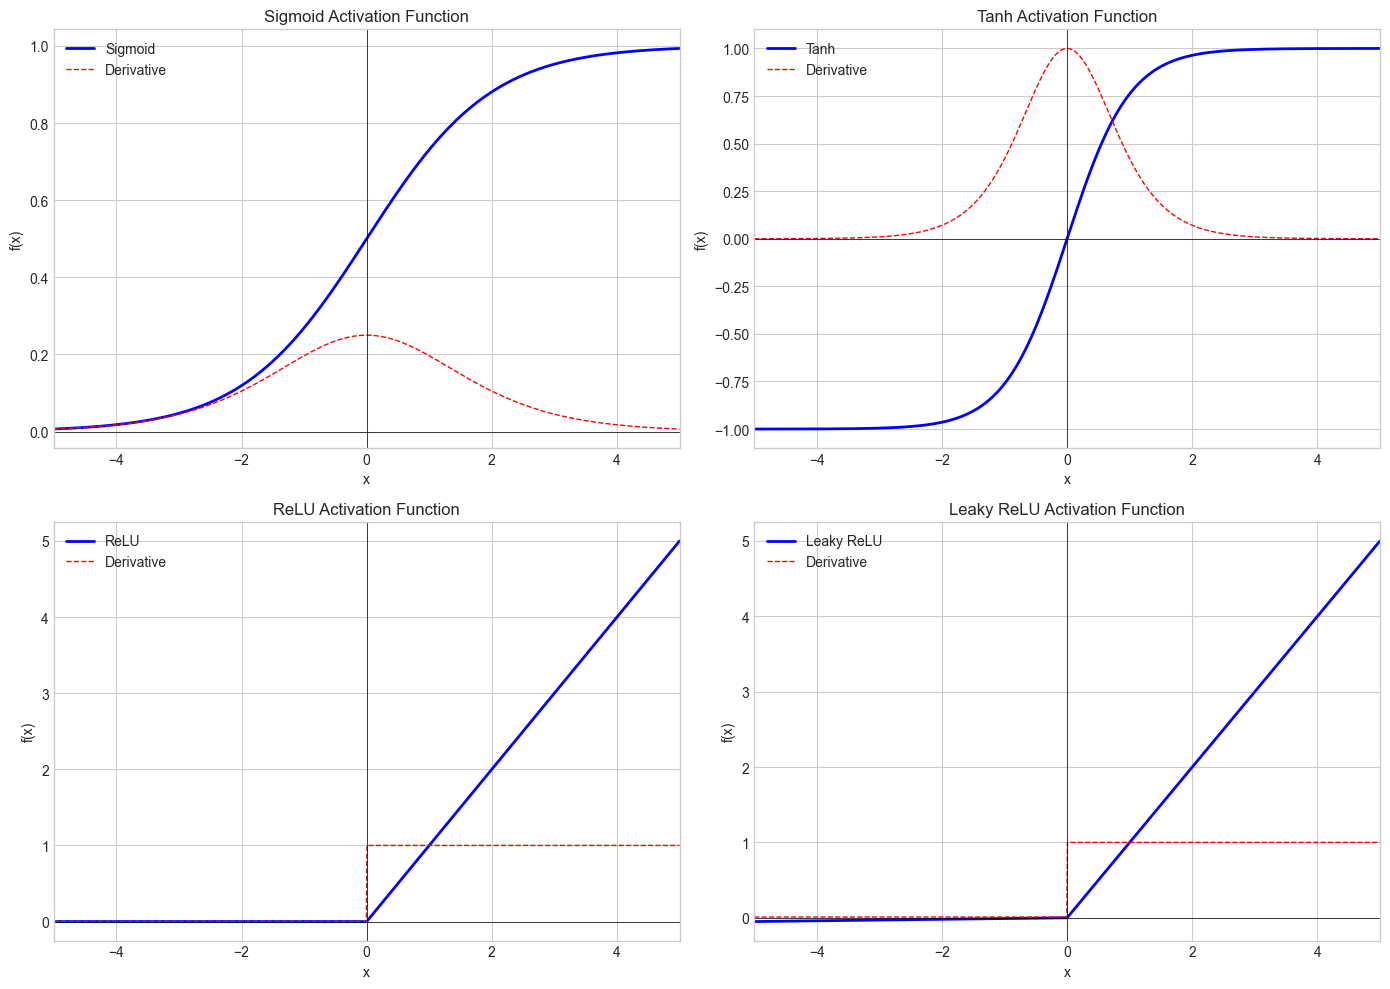

In [3]:
# Visualize activation functions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

activations = [
    ('Sigmoid', sigmoid(x), sigmoid_derivative(x)),
    ('Tanh', tanh(x), tanh_derivative(x)),
    ('ReLU', relu(x), relu_derivative(x)),
    ('Leaky ReLU', leaky_relu(x), np.where(x > 0, 1, 0.01))
]

for idx, (name, y, dy) in enumerate(activations):
    ax = axes.ravel()[idx]
    ax.plot(x, y, 'b-', lw=2, label=f'{name}')
    ax.plot(x, dy, 'r--', lw=1, label='Derivative')
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'{name} Activation Function')
    ax.legend()
    ax.set_xlim(-5, 5)
    ax.grid(True)

plt.tight_layout()
plt.show()

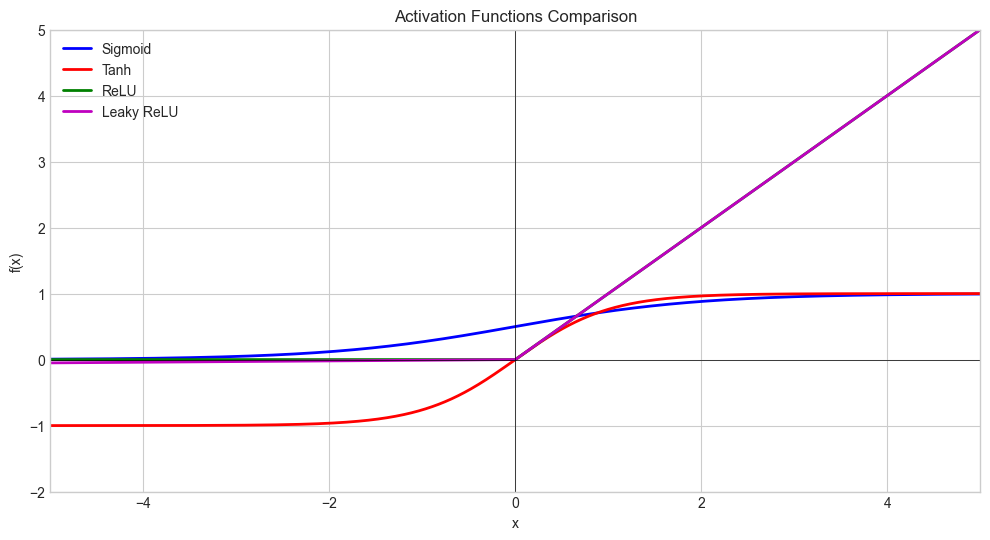

Activation Function Properties:
- Sigmoid: Output (0, 1), good for probabilities, vanishing gradient
- Tanh: Output (-1, 1), zero-centered, vanishing gradient
- ReLU: Output [0, ∞), fast, no vanishing gradient, dead neurons
- Leaky ReLU: Prevents dead neurons


In [4]:
# Compare all activations on same plot
plt.figure(figsize=(12, 6))

plt.plot(x, sigmoid(x), 'b-', lw=2, label='Sigmoid')
plt.plot(x, tanh(x), 'r-', lw=2, label='Tanh')
plt.plot(x, relu(x), 'g-', lw=2, label='ReLU')
plt.plot(x, leaky_relu(x), 'm-', lw=2, label='Leaky ReLU')

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Activation Functions Comparison')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-2, 5)
plt.grid(True)
plt.show()

print("Activation Function Properties:")
print("- Sigmoid: Output (0, 1), good for probabilities, vanishing gradient")
print("- Tanh: Output (-1, 1), zero-centered, vanishing gradient")
print("- ReLU: Output [0, ∞), fast, no vanishing gradient, dead neurons")
print("- Leaky ReLU: Prevents dead neurons")

### 💡 活性化関数の選び方

| 活性化関数 | いつ使う？ | メリット | デメリット |
|-----------|----------|---------|----------|
| **ReLU** | 👍 **デフォルト（ほとんどの場合）** | 計算が速い、勾配消失問題なし | Dead neurons（ニューロンが死ぬ）|
| **Tanh** | データが正規化されている場合 | 出力が-1～1でバランスが良い | 勾配消失問題あり |
| **Sigmoid** | 出力層（二値分類の確率） | 0～1の確率として解釈可能 | 勾配消失問題あり |
| **Leaky ReLU** | ReLUでDead neuronsが問題の時 | Dead neuronsを防ぐ | パラメータ調整が必要 |

**👍 ベストプラクティス**: 迷ったらReLUを使う！

---


## Part 2: MLP Architecture Basics

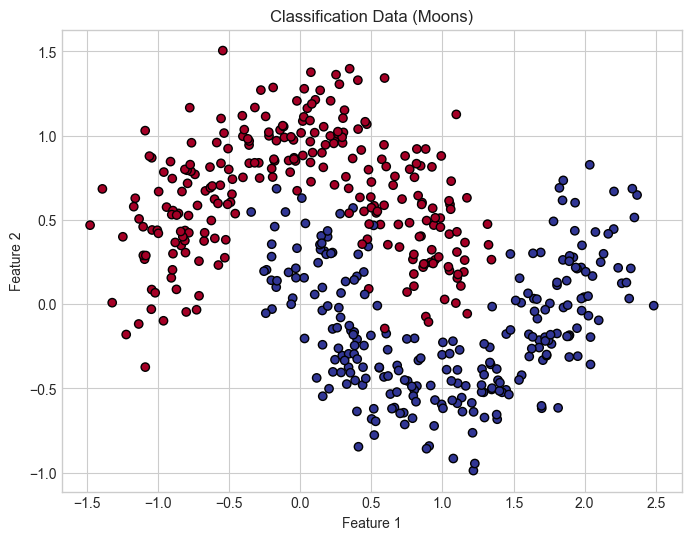

In [5]:
# Generate simple data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Data (Moons)')
plt.show()

In [6]:
# Train a simple MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),  # Single hidden layer with 10 neurons
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.01,
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# Model information
print("MLP Architecture:")
print(f"  Input layer: {X_train.shape[1]} features")
print(f"  Hidden layers: {mlp.hidden_layer_sizes}")
print(f"  Output layer: {len(np.unique(y))} classes")
print(f"\nTraining:")
print(f"  Iterations: {mlp.n_iter_}")
print(f"  Final loss: {mlp.loss_:.6f}")
print(f"\nPerformance:")
print(f"  Training accuracy: {mlp.score(X_train_scaled, y_train):.4f}")
print(f"  Test accuracy: {mlp.score(X_test_scaled, y_test):.4f}")

MLP Architecture:
  Input layer: 2 features
  Hidden layers: (10,)
  Output layer: 2 classes

Training:
  Iterations: 500
  Final loss: 0.047255

Performance:
  Training accuracy: 0.9800
  Test accuracy: 0.9800


/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### ⚠️ よくあるエラー #1: ConvergenceWarning

上のセルを実行すると、以下のような警告が出る可能性があります：

```
ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached 
and the optimization hasn't converged yet.
```

**原因:**
- イテレーション数（`max_iter`）が不足
- 学習率が不適切（大きすぎる or 小さすぎる）
- データがスケーリングされていない

**✅ 解決法:**

```python
# ❌ 問題あり
mlp = MLPClassifier(max_iter=100)  # 少なすぎる

# ✅ 改善策1: イテレーション数を増やす
mlp = MLPClassifier(max_iter=1000)

# ✅ 改善策2: Early Stoppingを使う（推奨）
mlp = MLPClassifier(max_iter=1000, early_stopping=True)

# ✅ 改善策3: データを必ずスケーリング
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

---


In [7]:
# Examine weights and biases
print("Network Parameters:")
for i, (w, b) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
    print(f"\nLayer {i+1}:")
    print(f"  Weights shape: {w.shape}")
    print(f"  Biases shape: {b.shape}")
    print(f"  Total parameters: {w.size + b.size}")

total_params = sum(w.size + b.size for w, b in zip(mlp.coefs_, mlp.intercepts_))
print(f"\nTotal network parameters: {total_params}")

Network Parameters:

Layer 1:
  Weights shape: (2, 10)
  Biases shape: (10,)
  Total parameters: 30

Layer 2:
  Weights shape: (10, 1)
  Biases shape: (1,)
  Total parameters: 11

Total network parameters: 41


## Part 3: Effect of Architecture (Number of Neurons)

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


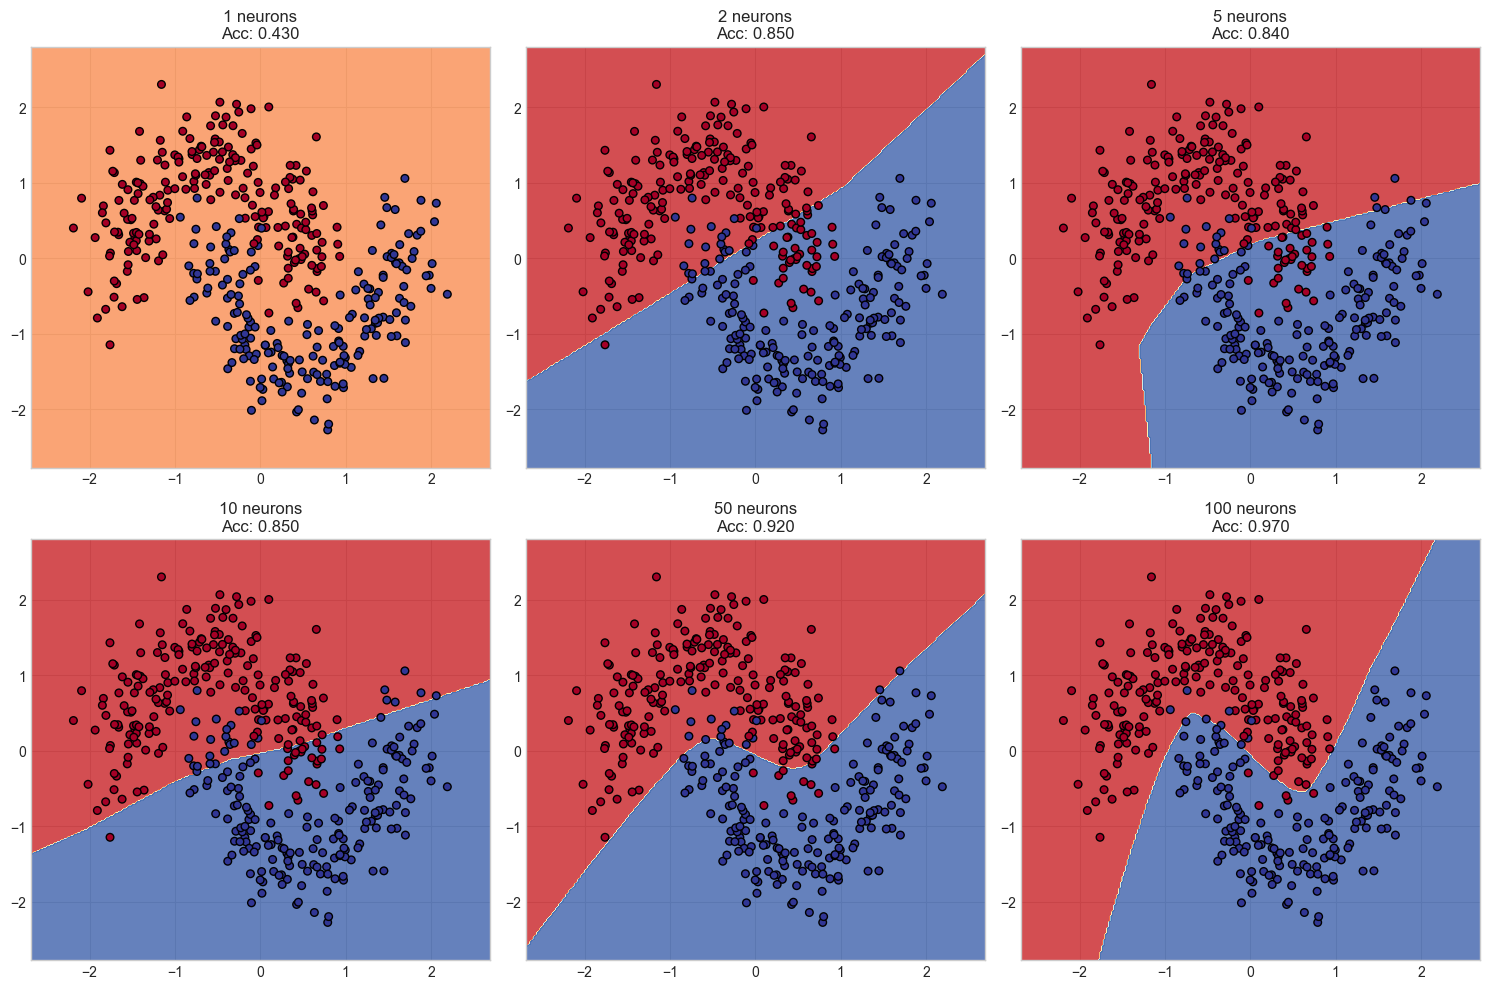

In [8]:
# Decision boundary function
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black', s=30)
    ax.set_title(title)

# Compare different numbers of neurons
neuron_counts = [1, 2, 5, 10, 50, 100]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, n_neurons in enumerate(neuron_counts):
    mlp = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    
    acc = mlp.score(X_test_scaled, y_test)
    plot_decision_boundary(mlp, X_train_scaled, y_train, axes[idx], 
                          f'{n_neurons} neurons\nAcc: {acc:.3f}')

plt.tight_layout()
plt.show()

## Part 4: Effect of Depth (Number of Layers)

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


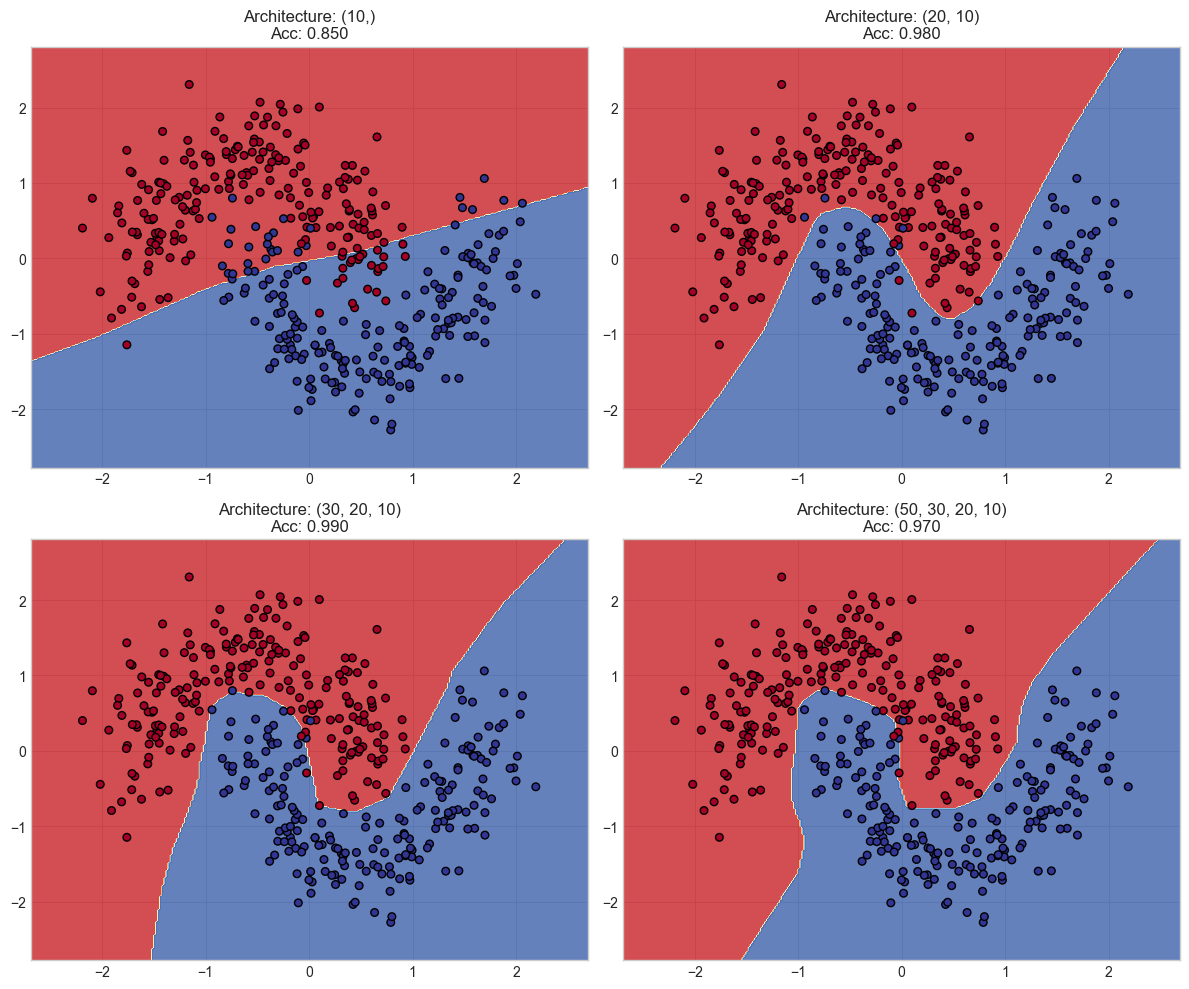

In [9]:
# Compare different network depths
architectures = [
    (10,),              # 1 hidden layer
    (20, 10),           # 2 hidden layers
    (30, 20, 10),       # 3 hidden layers
    (50, 30, 20, 10),   # 4 hidden layers
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, arch in enumerate(architectures):
    mlp = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    
    acc = mlp.score(X_test_scaled, y_test)
    plot_decision_boundary(mlp, X_train_scaled, y_train, axes[idx], 
                          f'Architecture: {arch}\nAcc: {acc:.3f}')

plt.tight_layout()
plt.show()

## Part 5: Effect of Activation Function

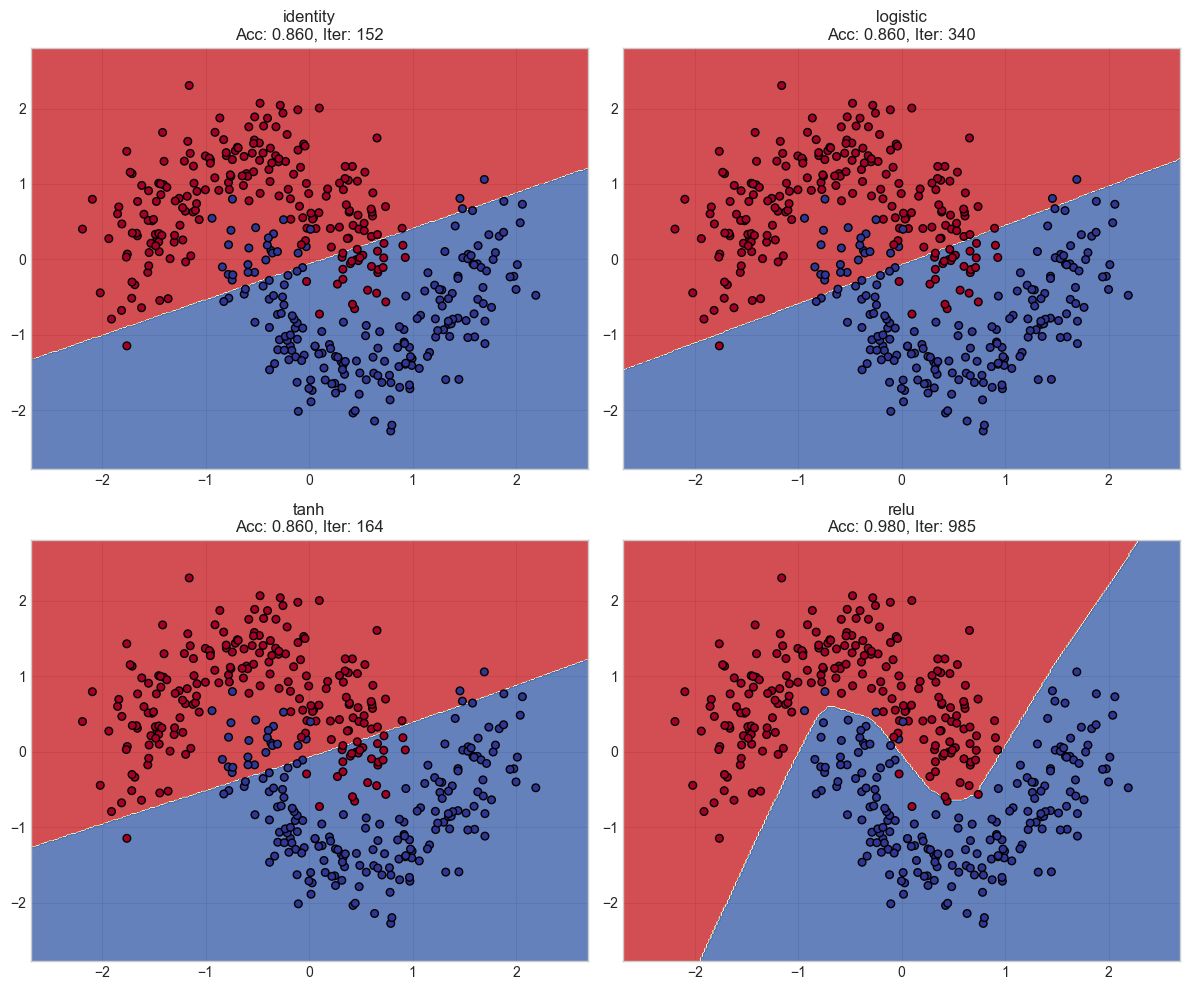

In [10]:
# Compare activation functions
activations = ['identity', 'logistic', 'tanh', 'relu']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, activation in enumerate(activations):
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        activation=activation,
        solver='adam',
        max_iter=1000,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    
    acc = mlp.score(X_test_scaled, y_test)
    plot_decision_boundary(mlp, X_train_scaled, y_train, axes[idx], 
                          f'{activation}\nAcc: {acc:.3f}, Iter: {mlp.n_iter_}')

plt.tight_layout()
plt.show()

## Part 6: Loss Curves and Convergence

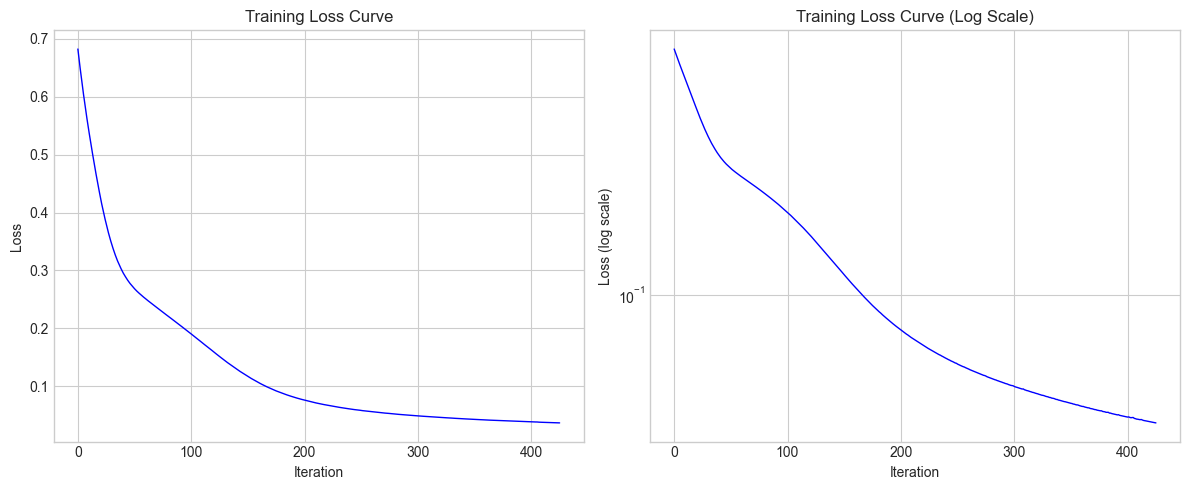

Final loss: 0.036741
Total iterations: 426


In [11]:
# Train MLP and track loss
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# Plot loss curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_, 'b-', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(mlp.loss_curve_, 'b-', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Loss (log scale)')
plt.title('Training Loss Curve (Log Scale)')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final loss: {mlp.loss_curve_[-1]:.6f}")
print(f"Total iterations: {mlp.n_iter_}")

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


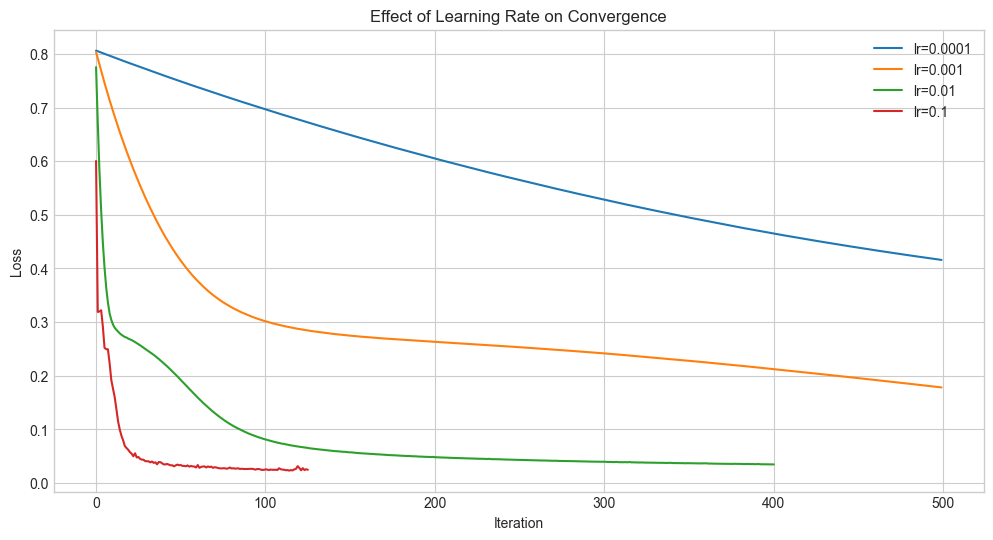

In [12]:
# Compare loss curves for different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='relu',
        solver='adam',
        learning_rate_init=lr,
        max_iter=500,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    
    plt.plot(mlp.loss_curve_, label=f'lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True)
plt.show()

## Part 7: Solvers (Optimization Algorithms)

/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


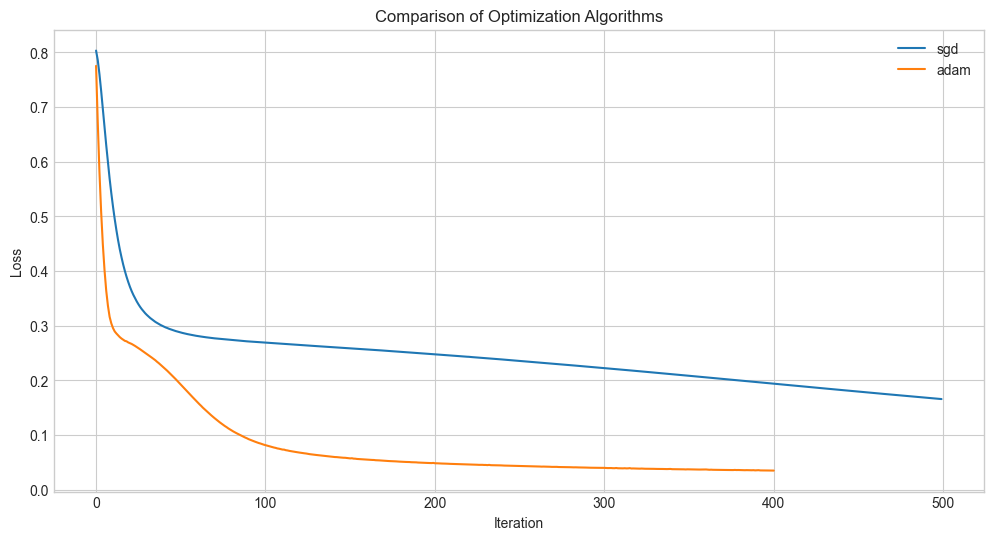


Solver Comparison:
solver  iterations final_loss  test_acc
   sgd         500   0.165667      0.93
  adam         401   0.034798      0.99
 lbfgs         247        N/A      0.96


In [13]:
# Compare different solvers
solvers = ['sgd', 'adam', 'lbfgs']

plt.figure(figsize=(12, 6))

results = []

for solver in solvers:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='relu',
        solver=solver,
        learning_rate_init=0.01,
        max_iter=500,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    
    if hasattr(mlp, 'loss_curve_'):
        plt.plot(mlp.loss_curve_, label=f'{solver}')
        final_loss = mlp.loss_curve_[-1]
    else:
        final_loss = 'N/A'
    
    results.append({
        'solver': solver,
        'iterations': mlp.n_iter_,
        'final_loss': final_loss,
        'test_acc': mlp.score(X_test_scaled, y_test)
    })

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Comparison of Optimization Algorithms')
plt.legend()
plt.grid(True)
plt.show()

print("\nSolver Comparison:")
print(pd.DataFrame(results).to_string(index=False))

## Part 8: MLP for Regression

In [14]:
# Generate regression data
X_reg, y_reg = make_regression(n_samples=500, n_features=10, n_informative=5, 
                               noise=20, random_state=42)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Train MLP Regressor
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

mlp_reg.fit(X_train_reg_scaled, y_train_reg)

# Evaluate
y_pred_reg = mlp_reg.predict(X_test_reg_scaled)

print("MLP Regressor Results:")
print(f"  R² Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")
print(f"  Iterations: {mlp_reg.n_iter_}")

MLP Regressor Results:
  R² Score: 0.8831
  RMSE: 23.5528
  Iterations: 1000


/Users/ikmx/source/personal/machine-learning-playground/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


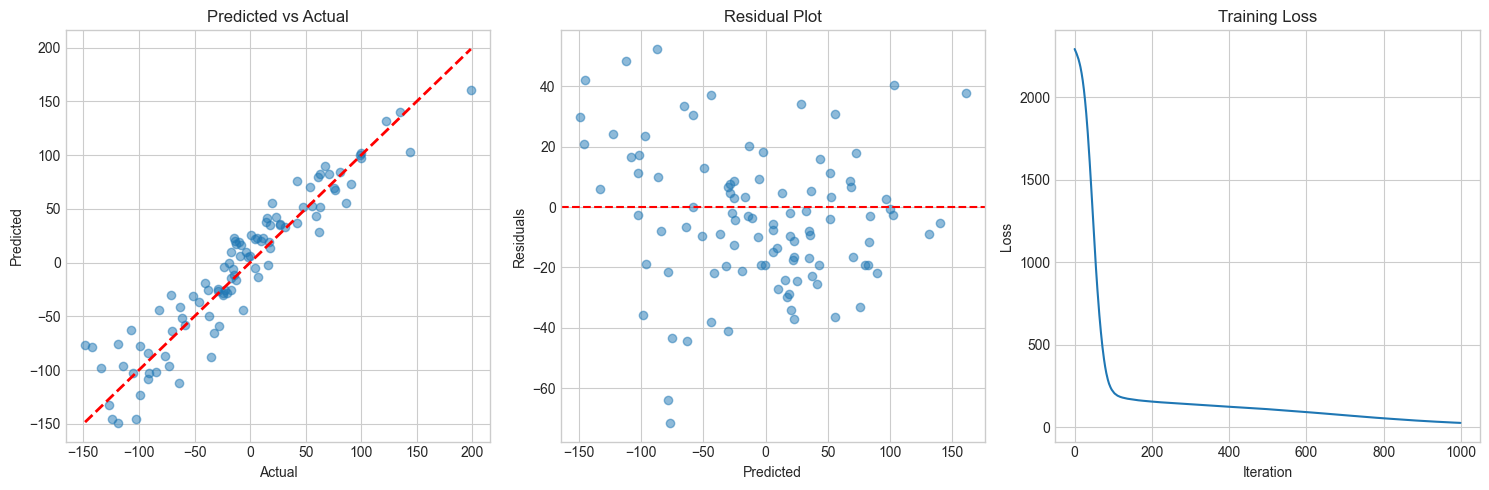

In [15]:
# Visualize regression results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Predicted vs Actual
axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.5)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Predicted vs Actual')

# Residuals
residuals = y_test_reg - y_pred_reg
axes[1].scatter(y_pred_reg, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Loss curve
axes[2].plot(mlp_reg.loss_curve_)
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Loss')
axes[2].set_title('Training Loss')

plt.tight_layout()
plt.show()

## Part 9: Early Stopping

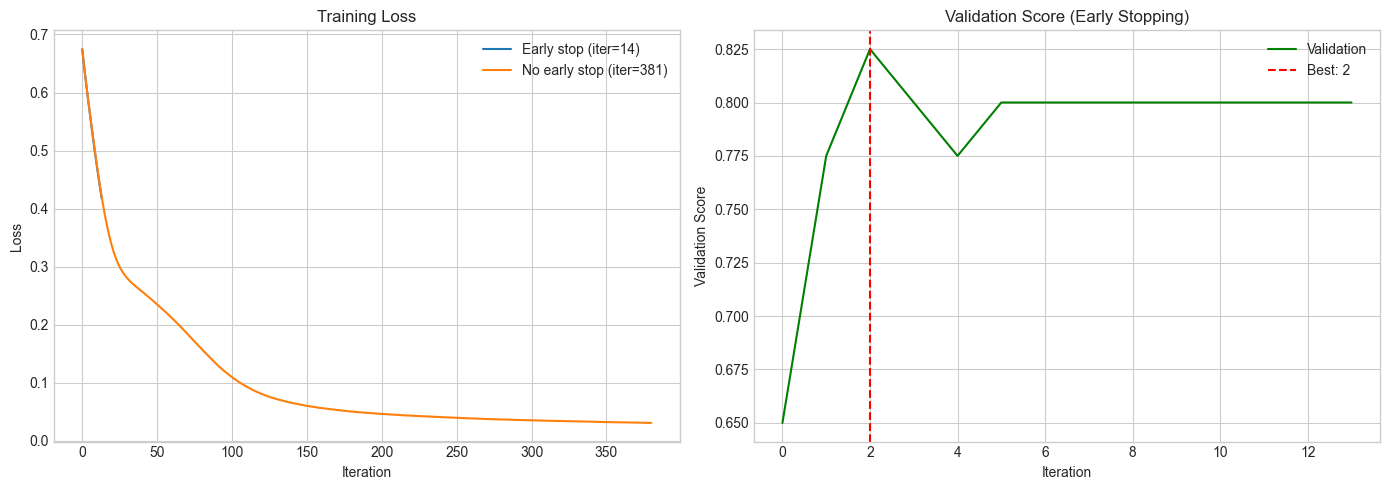


With early stopping:
  Iterations: 14
  Test accuracy: 0.8200

Without early stopping:
  Iterations: 381
  Test accuracy: 0.9900


In [16]:
# Train with early stopping
mlp_early = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,          # Enable early stopping
    validation_fraction=0.1,      # Use 10% of training data for validation
    n_iter_no_change=10,          # Stop if no improvement for 10 iterations
    random_state=42
)

mlp_early.fit(X_train_scaled, y_train)

# Compare with no early stopping
mlp_no_early = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=False,
    random_state=42
)

mlp_no_early.fit(X_train_scaled, y_train)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(mlp_early.loss_curve_, label=f'Early stop (iter={mlp_early.n_iter_})')
axes[0].plot(mlp_no_early.loss_curve_, label=f'No early stop (iter={mlp_no_early.n_iter_})')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].legend()
axes[0].grid(True)

# Validation curve (only available with early stopping)
if hasattr(mlp_early, 'validation_scores_'):
    axes[1].plot(mlp_early.validation_scores_, 'g-', label='Validation')
    best_iter = np.argmax(mlp_early.validation_scores_)
    axes[1].axvline(x=best_iter, color='r', linestyle='--', label=f'Best: {best_iter}')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Validation Score')
    axes[1].set_title('Validation Score (Early Stopping)')
    axes[1].legend()
    axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"\nWith early stopping:")
print(f"  Iterations: {mlp_early.n_iter_}")
print(f"  Test accuracy: {mlp_early.score(X_test_scaled, y_test):.4f}")

print(f"\nWithout early stopping:")
print(f"  Iterations: {mlp_no_early.n_iter_}")
print(f"  Test accuracy: {mlp_no_early.score(X_test_scaled, y_test):.4f}")

### ⚠️ よくあるエラー #2: データをスケーリングし忘れる

**問題のあるコード:**

```python
# ❌ スケーリングなし
mlp = MLPClassifier()
mlp.fit(X_train, y_train)  # X_trainが生データ
```

**結果:**
- 学習が遅い、または全く収束しない
- 精度が低い
- 損失曲線が不安定

**✅ 正しいコード:**

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 注意: fit_transformではなくtransform

mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
```

**重要**: テストセットには`transform()`のみ使用（`fit_transform()`ではない）！

---


## Part 10: Practical Tips

In [17]:
# Common MLP configurations
print("Common MLP Configurations:")
print("="*60)
print()
print("1. ARCHITECTURE")
print("   - Start with 1-2 hidden layers")
print("   - Neurons: Start with 50-100, tune based on data complexity")
print("   - Pyramid structure often works: (100, 50, 25)")
print()
print("2. ACTIVATION")
print("   - ReLU: Default choice for hidden layers")
print("   - Tanh: Good for normalized data")
print()
print("3. SOLVER")
print("   - Adam: Best for most cases")
print("   - LBFGS: Good for small datasets")
print("   - SGD: When you need fine control")
print()
print("4. REGULARIZATION")
print("   - alpha: L2 penalty (0.0001 to 0.1)")
print("   - early_stopping: Prevents overfitting")
print()
print("5. LEARNING RATE")
print("   - Start with 0.001 for Adam")
print("   - Reduce if loss oscillates")
print("   - Increase if convergence is too slow")

Common MLP Configurations:

1. ARCHITECTURE
   - Start with 1-2 hidden layers
   - Neurons: Start with 50-100, tune based on data complexity
   - Pyramid structure often works: (100, 50, 25)

2. ACTIVATION
   - ReLU: Default choice for hidden layers
   - Tanh: Good for normalized data

3. SOLVER
   - Adam: Best for most cases
   - LBFGS: Good for small datasets
   - SGD: When you need fine control

4. REGULARIZATION
   - alpha: L2 penalty (0.0001 to 0.1)
   - early_stopping: Prevents overfitting

5. LEARNING RATE
   - Start with 0.001 for Adam
   - Reduce if loss oscillates
   - Increase if convergence is too slow


### 💡 実践的なベストプラクティス

#### 🎯 アーキテクチャ設計の指針

**開始点:**
1. **小さく始める**: `hidden_layer_sizes=(50,)` から開始
2. **必要に応じて拡大**: 精度が不十分なら層やニューロンを追加
3. **ピラミッド構造**: `(100, 50, 25)` のように減少させる

**層数の選び方:**
- **1層**: 単純な非線形パターン
- **2-3層**: ほとんどの実用的な問題
- **4層以上**: 複雑な問題（ただし、scikit-learnより深層学習フレームワークを検討）

#### ⚙️ ハイパーパラメータの推奨値

```python
# 推奨デフォルト設定
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),      # 2層、ピラミッド構造
    activation='relu',                 # ReLUがデフォルト
    solver='adam',                     # Adamが最も汎用的
    alpha=0.0001,                      # L2正則化（デフォルト）
    learning_rate_init=0.001,          # Adamの推奨学習率
    max_iter=1000,                     # 十分なイテレーション
    early_stopping=True,               # 過学習防止
    validation_fraction=0.1,           # 検証用に10%
    n_iter_no_change=10,               # 10回改善なしで停止
    random_state=42                    # 再現性のため
)
```

#### 🔍 デバッグのコツ

**学習がうまくいかない時のチェックリスト:**

1. ✅ データをスケーリングしたか？
2. ✅ 訓練セットとテストセットで同じscalerを使っているか？
3. ✅ `max_iter`は十分か？
4. ✅ 損失曲線を確認したか？（振動？収束？）
5. ✅ クラスの不均衡はないか？

**損失曲線の読み方:**
- **右肩下がり**: ✅ 正常に学習中
- **平坦**: 収束した or 学習率が小さすぎる
- **振動**: 学習率が大きすぎる
- **上昇**: 問題あり！学習率を下げる

---


## Summary

In this notebook, you learned:

### MLP Architecture
- Input layer → Hidden layers → Output layer
- Each layer has neurons with weights and biases
- Activation functions add non-linearity

### Key Components
- **Activation Functions**: ReLU (default), tanh, sigmoid
- **hidden_layer_sizes**: Architecture tuple, e.g., (100, 50)
- **Solvers**: Adam (default), SGD, LBFGS

### Training
- Loss curves show convergence
- Early stopping prevents overfitting
- Learning rate affects convergence speed

### Key Takeaways
- Always scale input features
- Start simple, increase complexity as needed
- Use early stopping to prevent overfitting
- Monitor loss curves for debugging

### Next Steps
Continue to **Notebook 08** for comprehensive MLP parameter space exploration!

---

## 🎓 自己評価クイズ

学習内容を確認しましょう！

### Q1: MLPで最も重要な前処理は何ですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 特徴量のスケーリング（StandardScalerなど）

**理由**: ニューラルネットワークは特徴量のスケールに非常に敏感です。スケールが異なる特徴量があると：
- 学習が遅くなる
- 収束しない可能性がある
- 一部の特徴量が過度に重視される

</details>

### Q2: ReLUの主な利点は何ですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 
1. 計算が高速（max(0, x)だけ）
2. 勾配消失問題がない（x > 0の場合、勾配=1）
3. 実践的に優れた性能

**欠点**: Dead neurons（一部のニューロンが常に0を出力し、学習しなくなる）

</details>

### Q3: Early Stoppingとは何ですか？なぜ使うのですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 検証セットの性能が改善しなくなったら訓練を早期に停止する手法。

**使う理由**:
- 過学習を防ぐ
- 訓練時間を節約
- 最適なイテレーション数を自動で見つける

**使い方**:
```python
mlp = MLPClassifier(early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
```

</details>

### Q4: `hidden_layer_sizes=(100, 50)` は何を意味しますか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 
- 第1隠れ層: 100個のニューロン
- 第2隠れ層: 50個のニューロン
- 合計2つの隠れ層

アーキテクチャ全体:
```
入力層(n_features) → 隠れ層1(100) → 隠れ層2(50) → 出力層(n_classes)
```

</details>

### Q5: 損失曲線が振動している場合、どうすべきですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 学習率（`learning_rate_init`）を下げる

**対処法**:
```python
# 振動している場合
mlp = MLPClassifier(learning_rate_init=0.0001)  # 0.001から0.0001に下げる
```

**逆に**、収束が遅すぎる場合は学習率を上げる。

</details>

---


## 🏋️ 演習問題

実際に手を動かして理解を深めましょう！

---


### 📝 基礎問題1: Circles データセットでMLPを訓練

**課題**: `make_circles` データセットでMLPを訓練し、テスト精度0.90以上を達成してください。

<details>
<summary>💡 ヒント1</summary>

- `make_circles`は2つの同心円のデータセット
- 線形分離不可能なので、隠れ層が必要
- まず`hidden_layer_sizes=(10,)`から試してみましょう

</details>

<details>
<summary>💡 ヒント2</summary>

- データのスケーリングを忘れずに！
- `noise=0.1`で生成すると適度な難易度になります

</details>

<details>
<summary>✅ 解答例</summary>

```python
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# データ生成
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42)

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# スケーリング
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP訓練
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# 評価
print(f"Test Accuracy: {mlp.score(X_test_scaled, y_test):.4f}")
# 期待される出力: Test Accuracy: 0.9700以上
```

</details>


In [ ]:
# ここにコードを書いてください



---

### 📝 基礎問題2: 損失曲線の分析

**課題**: 上で訓練したMLPの損失曲線をプロットし、収束を確認してください。

<details>
<summary>💡 ヒント</summary>

- `mlp.loss_curve_`に損失の履歴が保存されています
- `plt.plot()`で簡単にプロットできます

</details>

<details>
<summary>✅ 解答例</summary>

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

print(f"Initial loss: {mlp.loss_curve_[0]:.4f}")
print(f"Final loss: {mlp.loss_curve_[-1]:.4f}")
print(f"Total iterations: {mlp.n_iter_}")
```

</details>


In [ ]:
# ここにコードを書いてください



---

### 📝 応用問題: グリッドサーチで最適なハイパーパラメータを見つける

**課題**: `GridSearchCV`を使って、`make_moons`データセットに対する最適なMLPハイパーパラメータを見つけてください。

**探索するパラメータ:**
- `hidden_layer_sizes`: `[(10,), (50,), (20, 10)]`
- `alpha`: `[0.0001, 0.001, 0.01]`
- `learning_rate_init`: `[0.001, 0.01]`

<details>
<summary>💡 ヒント</summary>

- `GridSearchCV`は`sklearn.model_selection`からインポート
- `cv=5`で5分割交差検証
- `n_jobs=-1`で並列処理（高速化）

</details>

<details>
<summary>✅ 解答例</summary>

```python
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons

# データ準備
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# パラメータグリッド
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (20, 10)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# グリッドサーチ
mlp = MLPClassifier(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# 結果
print("Best parameters:", grid_search.best_params_)
print(f"Best CV score: {grid_search.best_score_:.4f}")
print(f"Test score: {grid_search.score(X_test_scaled, y_test):.4f}")
```

</details>


In [ ]:
# ここにコードを書いてください



---

### 🔥 チャレンジ問題: 多クラス分類

**課題**: `make_classification`で4クラスのデータセットを生成し、MLPで分類してください。混同行列とクラスごとの精度を表示してください。

**要件:**
- 4クラス（`n_classes=4`）
- 特徴量20個（`n_features=20`）
- サンプル数2000個
- 全体精度0.80以上
- 混同行列をヒートマップで可視化

<details>
<summary>💡 ヒント</summary>

- `make_classification(n_classes=4, n_clusters_per_class=1)`
- `confusion_matrix`は`sklearn.metrics`から
- `sns.heatmap()`でヒートマップ表示
- `classification_report`でクラスごとの詳細を表示

</details>

<details>
<summary>✅ 解答例</summary>

```python
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# データ生成
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=15,
    n_classes=4,
    n_clusters_per_class=1,
    random_state=42
)

# 分割・スケーリング
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP訓練
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    early_stopping=True,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# 予測
y_pred = mlp.predict(X_test_scaled)

# 混同行列
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# クラスごとの詳細
print(classification_report(y_test, y_pred))
print(f"\nOverall Accuracy: {mlp.score(X_test_scaled, y_test):.4f}")
```

</details>


In [ ]:
# ここにコードを書いてください



---

## 📖 コラム: 万能近似定理とは？

### 理論的背景

1989年、George Cybenkoは驚くべき定理を証明しました：

> **万能近似定理**: 十分な数のニューロンを持つ1層の隠れ層を持つニューラルネットワークは、  
> 任意の連続関数を任意の精度で近似できる。

### これは何を意味するのか？

理論的には、`hidden_layer_sizes=(10000,)` のような単層の巨大なネットワークで  
あらゆる関数を近似できます。

### しかし、実際には...

**問題:**
- 「近似できる」≠「効率的に学習できる」
- 単層では必要なニューロン数が膨大になる
- 訓練に時間がかかりすぎる

**解決策: 深いネットワーク**
- 多層（深い）ネットワークは、より少ないパラメータで複雑な関数を表現可能
- 例: `(100, 50, 25)` は `(1000,)` より効率的なことが多い

これが**Deep Learning**（深層学習）の理論的基礎です！

### 実験で確認

同じ性能を達成するのに：
- 単層: `(500,)` → 約10,000パラメータ
- 多層: `(50, 25, 10)` → 約2,000パラメータ

**結論**: 深いネットワークの方が効率的！

### 参考文献
- Cybenko, G. (1989) "Approximation by superpositions of a sigmoidal function"
- Hornik, K. (1991) "Approximation capabilities of multilayer feedforward networks"

---


## 🎯 学習進捗の記録

この章を完了したら、以下のセルを実行して進捗を記録しましょう！


In [ ]:
# 🎯 進捗管理システム
import json
from pathlib import Path
from datetime import datetime

def mark_complete(notebook_number, notebook_name):
    """このノートブックを完了済みにマーク"""
    progress_file = Path("../learning_progress.json")
    
    # Load existing progress
    if progress_file.exists():
        with open(progress_file, 'r') as f:
            progress = json.load(f)
    else:
        progress = {"completed": [], "timestamps": {}}
    
    # Mark as complete
    if notebook_number not in progress["completed"]:
        progress["completed"].append(notebook_number)
        progress["completed"].sort()
        progress["timestamps"][str(notebook_number)] = datetime.now().isoformat()
    
    # Save
    with open(progress_file, 'w') as f:
        json.dump(progress, f, indent=2)
    
    # Display progress
    total_notebooks = 13
    completion_rate = len(progress["completed"]) / total_notebooks * 100
    
    print(f"\n{'='*60}")
    print(f"🎉 Notebook {notebook_number:02d}: {notebook_name} 完了！")
    print(f"{'='*60}")
    print(f"\n📊 全体進捗: {completion_rate:.1f}% ({len(progress['completed'])}/{total_notebooks})")
    
    # Progress bar
    bar_length = 40
    filled = int(bar_length * completion_rate / 100)
    bar = '█' * filled + '░' * (bar_length - filled)
    print(f"\n[{bar}] {completion_rate:.0f}%\n")
    
    # Badges
    if completion_rate >= 25 and completion_rate < 50:
        print("🏆 バッジ獲得: ビギナー（25%達成）")
    elif completion_rate >= 50 and completion_rate < 75:
        print("🏆 バッジ獲得: 中級者（50%達成）")
    elif completion_rate >= 75 and completion_rate < 100:
        print("🏆 バッジ獲得: 上級者（75%達成）")
    elif completion_rate >= 100:
        print("🎓 バッジ獲得: マスター（100%達成）")
        print("\n✨ おめでとうございます！全ノートブックを完了しました！ ✨")
    
    # Next notebook
    if notebook_number < total_notebooks:
        print(f"\n➡️  次のノートブック: Notebook {notebook_number+1:02d}")
    
    print(f"\n{'='*60}\n")

# このノートブックを完了したら以下のコメントを外して実行
# mark_complete(7, "MLP Fundamentals")

---

## ➡️ 次のステップ

### 学習を続ける

MLPの基礎を理解したら、次は：

**📗 Notebook 08: MLP Parameter Space Exploration**
- より広範なハイパーパラメータ探索
- ヒートマップでパラメータの影響を可視化
- 最適化戦略の理解

### 復習が必要な場合

- **Notebook 02**: 前処理とスケーリングを復習
- **Notebook 03**: 評価指標を復習
- **Notebook 04-06**: 他のアルゴリズムと比較

### さらに学ぶために

**書籍:**
- "Neural Networks and Deep Learning" by Michael Nielsen（無料オンライン）
- "Deep Learning" by Goodfellow, Bengio, and Courville

**オンラインコース:**
- Coursera: "Neural Networks and Deep Learning" by Andrew Ng
- Fast.ai: "Practical Deep Learning for Coders"

**実践:**
- Kaggle competitions で実データに挑戦
- UCI ML Repository のデータセットで練習

---

### 🎉 お疲れ様でした！

この章で学んだMLPの知識は、Deep Learningへの第一歩です。  
次の章でさらに深く探求しましょう！
